# Filtros FIR diseñados por el Algoritmo de Parks-McClellan (PM)
<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

## Introducción

El algoritmo de Parks-McClellan es una técnica poderosa utilizada para diseñar filtros FIR óptimos en términos de minimización del error máximo en las bandas de frecuencia de interés. Este error, también conocido como error de Chebyshev, se minimiza utilizando el método de alternancia de Remez, que busca distribuir el error de manera *equirriple* en la banda de frecuencia.

El objetivo es encontrar los coeficientes del filtro FIR que minimicen el rizado (ripple) en la respuesta en frecuencia, en función de un conjunto deseado de características, como el paso bajo, paso alto, o pasa banda.

### 2. Respuesta deseada y real del filtro

Se define la respuesta deseada $ D(\Omega) $ en la banda de frecuencia, donde $ \Omega $ es la frecuencia angular normalizada (de $ 0 $ a $ \pi $).

Para un filtro FIR de $ L $ coeficientes, la respuesta en frecuencia se puede expresar como:

$$
H(\Omega) = \sum_{k=0}^{L-1} h[k] \cdot e^{-j2\pi\Omega k} = H_R(\Omega) \cdot e^{j \cdot \varphi(\Omega) \cdot k}
$$

De los filtros FIR de tipo $I$ podemos decir que la parte real será:

$$
H_R(\Omega) = h[M] + \sum_{k=1}^{M} 2.h[M-k] \cdot \cos(\pi\Omega k)
$$

y recordando que el módulo  $ \left| H(\Omega) \right| = \left| H_R(\Omega) \right| $. Del mismo modo consideraremos $M = \frac{L-1}{2}$ al punto medio de la respuesta al impulso $h(k)$, que para los FIR tipo $I$ debe ser entero.

Se verá que al querer expresar matricialmente la función objetivo a minimizar, resultará más útil expresar la respuesta:

$$
H_R(\Omega) = \sum_{k=0}^{M} a[M-k] \cdot \cos(\pi\Omega k)
$$


### Criterio Minimax
El objetivo del algoritmo es minimizar el error entre $ H_R(\Omega) $ y $ D(\Omega) $ en las bandas de frecuencia de interés. El error ponderado se define como:

$$
E(\Omega) = W(\Omega) \cdot [D(\Omega) - H_R(\Omega)]
$$

donde $ W(\Omega) $ es una función de peso o ponderación, que permite enfatizar o atenuar el error en diferentes partes de la banda de frecuencia.

El problema de optimización se formula como una **minimización del máximo error absoluto**:

$$
\min_h \max_{\Omega \in \Omega} \left| E(\Omega) \right|
$$


### Teorema de la Alternancia (Teorema de Chebyshev)
El *Teorema de la Alternancia* será fundamental para la formulación del error en forma matricial, de manera que sea fácilmente implementado en cualquier lenguaje de programación. El algoritmo de Parks-McClellan, establece que la solución óptima de un problema *minimax* es aquella donde el error ponderado $ E(\Omega) $ alterna en signo en **al menos** $ R = M + 2 $ puntos extremos, y que el error tiene el mismo valor absoluto en estos puntos.

Matemáticamente, si $F=[ \Omega_0, \Omega_1, \dots, \Omega_{R-1}] $ son los puntos extremos de $ \Omega $, entonces en la solución óptima se cumple:

$$
E(\Omega_i) = (-1)^i \cdot \epsilon \quad \text{para } i = 0, 1, \dots, R-1
$$

Donde:
- $ \epsilon $ es el valor del ripple y/o atenuación, que es constante y de igual magnitud en los puntos extremos, pero alterna en signo.
- $ E(\Omega) $ es el error pesado entra la respuesta deseada y la real del filtro.

### Planteo Matricial y cálculo de $h(k)$

El algoritmo se basa en la solución de un problema de aproximación que se puede expresar matricialmente. Aquí se explica cómo se formula el problema y cómo se resuelve.

$$
W(\Omega) \cdot [D(\Omega) - H_R(\Omega)] = 
$$

$$
 H_R(\Omega) + \frac{(-1)^i \cdot \epsilon}{W(\Omega)} = D(\Omega) 
$$

$$
 \sum_{k=0}^{M} a[M-k] \cdot \cos(\pi\Omega k) + \frac{(-1)^i \cdot \epsilon}{W(\Omega)} = D(\Omega) 
$$

$$
\begin{bmatrix}
1 &  \cos(\Omega_0) &  \cos(2\Omega_0) & \dots &  \cos(M\Omega_0) & \frac{(-1)^0}{W(\Omega_0)} \\
1 &  \cos(\Omega_1) &  \cos(2\Omega_1) & \dots &  \cos(M\Omega_1) & \frac{(-1)^1}{W(\Omega_1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
1 &  \cos(\Omega_{R-1}) &  \cos(2\Omega_{R-1}) & \dots &  \cos(M\Omega_{R-1}) & \frac{(-1)^{R-1}}{W(\Omega_{R-1})}  \\
\end{bmatrix}
\begin{bmatrix}
a_M \\
a_{M-1} \\
\vdots \\
a_0 \\
\epsilon \\
\end{bmatrix}
=
\begin{bmatrix}
 D(\Omega_0) \\
 D(\Omega_1) \\
\vdots \\
 D(\Omega_{R-1}) \\
\end{bmatrix}
$$

Este sistema de ecuaciones se resuelve para los valores de $a_i(k)$ en la *i-ésima* iteración, y luego se calculan los coeficientes $h_i(k)$, siendo:

* $ 2*h_i[0] = a[0] $
* $ \quad \vdots $
* $ 2*h_i[M-1] = a[M-1] $ 
* $ \frac{1}{2} \cdot h_1[M] = a[M] $

y por simetría:
* $ h_i[0] = h_1[L] $
* $ h_i[1] = h_i[L-1] $
* $ \quad \vdots $
* $ h_i[M] $ muestra por donde pasa el eje de simetría de la respuesta.


### Actualización de frecuencias extremas $F$

En base a los coeficientes calculados en el paso anterior, se recalcula la respuesta en frecuencia 

$$
H_i(\Omega) = \sum_{k=0}^{L-1} h_i[k] \cdot e^{-j2\pi\Omega k} 
$$

y la señal de error

$$
E_i(\Omega) = W(\Omega) \cdot [D(\Omega) - H_{Ri}(\Omega)]
$$

que resultará en un nuevo juego de **valores extremos** para cada iteración 

$ F = [ \Omega_{0,i}, \Omega_{1,i}, \dots, \Omega_{R-1,i}] $ 

se define un error de frecuencia como

$$ E_{f,i} = \left| F_{i} - F_{i-1} \right| $$

y, finalmente, si se excede una tolerancia de frecuencia $\delta_f$, se vuelve al paso de recalcular la respuesta $h_{i+1}$ hasta que se cumpla que $E_{f,i} < \delta_f$, o se exceda una cantidad máxima de iteraciones.


### Filtro resultante y aspectos prácticos

El algoritmo de Parks-McClellan es una herramienta eficiente para diseñar filtros FIR **óptimos** en términos de minimizar el error extremo en las bandas de frecuencia de interés (paso y atenuación). Los filtros resultantes de este algoritmo presentan una respuesta $H_R(\Omega)$ oscilatoria en ambas bandas, denominada *equiripple*. Cuando el algoritmo converge satisfactoriamente, los filtros equiripple alcanzan la respuesta deseada $D(\Omega)$ (dentro de una tolerancia prestablecida) con un tamaño $L$ que generalmente es el más bajo posible. Este aspecto de optimicidad del tamaño se verifica en la generalidad de los diseños con transferencias habituales (pasabajo, pasabanda, etc.), aunque **no significa** que se cumple en la totalidad de los casos o posibles diseños. 

Es decir que se trata de un algoritmo muy **poderoso** y práctico, **siempre que se logre la convergencia**. La inclusión de una función de peso $ W(\Omega) $ permite personalizar el diseño para cumplir con especificaciones particulares en diferentes bandas de frecuencia.


### Ejemplo de diseño


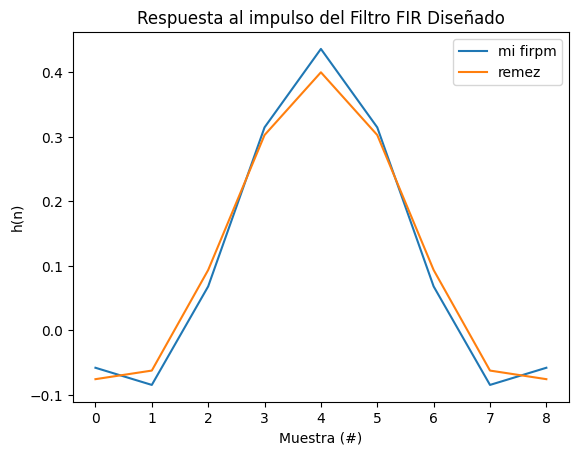

In [8]:
from pytc2.sistemas_lineales import plot_plantilla

# Parámetros PM algorithm
fs = 2.0
maxit = 100
lgrid = 16

filter_type = 'lowpass'

fpass = 0.4 # 
ripple = 0.5 # dB
fstop = 0.6 # Hz
attenuation = 40 # dB

# Define the band edges and gains
wTedges = np.array([fpass, fstop])

b = [1, 0]  # Gains in the bands
# d = [0.02, 0.0025]  # Acceptable deviations
d = np.array([-ripple, -attenuation])  # Acceptable deviations
d = 10**(d/20)
d = np.array([(1-d[0]), d[1] ])

# Compute the required stopband attenuation and passband ripple
Amaxreq = 20 * np.log10(1 + d[0] / (1 - d[0]))
Aminreq = 20 * np.log10((1 + d[0]) / d[1])

print(f"Amaxreq = {Amaxreq:.4f} dB")
print(f"Aminreq = {Aminreq:.4f} dB")

# Estimate filter order
N, Be, D, W = L_PHASE_LP_FIR_ORDER(wTedges, d)
# W = [1, 50]  # Weighting factors



# Output estimated order
print(f"Estimated order (N): {N}")

# Increase order to ensure meeting the criteria
if N%2 == 0:
    N += 1  # Minimum order (16) to meet the criteria
print(f"Final filter order: {N}")

# Filter type (multiband)
Ftype = 'm'

# plt.close('all')

# Design the filter using the Remez algorithm
hh, Err, wext = REMEZ_FIR(order=N, edge=Be, fx=D, 
                          wtx = W, filter_type = Ftype, 
                          lgrid = lgrid, maxiter=maxit)

# Calculate resulting passband and stopband ripples
deltac = Err / W[0]
deltas = Err / W[1]

# Normalize the maximum gain to 1
hh_tapio = hh / (1 + deltac)

# Design the filter using the Remez algorithm
hh_mio, Err, wext = REMEZ_FIR_MLLS(order=N, edge=Be, fx=D, 
                          wtx = W, filter_type = Ftype, 
                          lgrid = lgrid, maxiter=maxit, bDebug= True)

# Normalize the maximum gain to 1
hh_mio = hh_mio / (1 + deltac)

# Output the errors and attenuation values
print(f"Err = {Err:.8f}")
Amax = 20 * np.log10((1 + deltac) / (1 - deltac))
Amin = 20 * np.log10((1 - deltac) / deltas)
print(f"Amax = {Amax:.6f} dB")
print(f"Amin = {Amin:.4f} dB")

fs = 2.0
h_firpm = remez(N, Be, [1, 0], weight= W, fs=2.0, maxiter=maxit)

fft_sz = 512
half_fft_sz = fft_sz//2

H_mio = np.fft.fft(hh_mio, fft_sz)
H_tapio = np.fft.fft(hh_tapio, fft_sz)
H_scipy = np.fft.fft(h_firpm, fft_sz)
frecuencias = np.arange(start=0, stop=fs, step=fs/fft_sz )

wextt = (wext * (half_fft_sz-1)).astype(int)

plt.figure()
plt.clf()

# Graficar la respuesta en frecuencia
plt.plot(frecuencias[:half_fft_sz], 20*np.log10(np.abs(H_mio[:half_fft_sz])), label='mi firPM')
plt.plot(frecuencias[wextt], 20*np.log10(np.abs(H_mio[wextt])), 'or', label='$\omega_{ext}$')
# plt.plot(frecuencias[:half_fft_sz], 20*np.log10(np.abs(H_tapio[:len(H_tapio)//2])), label='Tapio')
plt.plot(frecuencias[:half_fft_sz], 20*np.log10(np.abs(H_scipy[:len(H_scipy)//2])), label='Scipy')

plot_plantilla(filter_type = filter_type , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)

plt.title("Respuesta en Frecuencia del Filtro FIR Diseñado")
plt.xlabel("Frecuencia Normalizada")
plt.ylabel("Magnitud")
plt.legend()
plt.show()



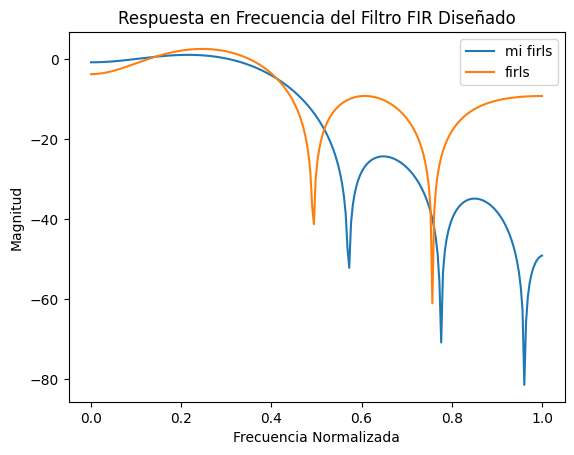

In [9]:
import matplotlib.pyplot as plt

# Calcular la respuesta en frecuencia del filtro diseñado
H = np.fft.fft(h, 512)
H_firls = np.fft.fft(h_firpm, 512)
frecuencias = np.linspace(0, 1.0, len(H)//2)

# Graficar la respuesta en frecuencia
plt.plot(frecuencias, 20*np.log10(np.abs(H[:len(H)//2])), label='mi firls')
plt.plot(frecuencias, 20*np.log10(np.abs(H_firls[:len(H_firls)//2])), label='firls')
plt.title("Respuesta en Frecuencia del Filtro FIR Diseñado")
plt.xlabel("Frecuencia Normalizada")
plt.ylabel("Magnitud")
plt.legend()
plt.show()
